# Regressão Linear: Relação entre Experiência e Salário

Uma análise simples e direta sobre como os anos de experiência impactam o salário, com base em dados disponíveis.
Este notebook implementa um modelo de regressão linear para prever salários a partir da experiência profissional.


## Introdução

O objetivo deste projeto é explorar a relação entre **anos de experiência** e **salário** usando um modelo de regressão linear.

Apesar de ser um modelo básico, ele ainda é útil para capturar tendências gerais e entender como variáveis quantitativas se correlacionam — ou não.

In [4]:
# Carregando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
# Carregando os dados
df = pd.read_csv('Salary_dataset.csv')

In [6]:
# Visualizando os dados
df.head(10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


Percebe-se a existência de uma coluna denominada `Unnamed: 0`, que foi gerada automaticamente como índice.

Em razão de essa coluna não possuir valor analítico, deve-se removê-la.

In [7]:
# Removendo a coluna 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis = 1)
df.head(10)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


O dataset foi carregado e as colunas desnecessárias foram removidas.

A estrutura dos dados é simples: `YearsExperience` (anos de experiência) e `Salary` (salário em doláres por ano).


## Análise Exploratória

Nesta etapa, observa-se visualmente a relação entre os anos de experiência e o salário, além de verificar a correlação estatística entre as variáveis usando a matriz de correlação de Pearson.


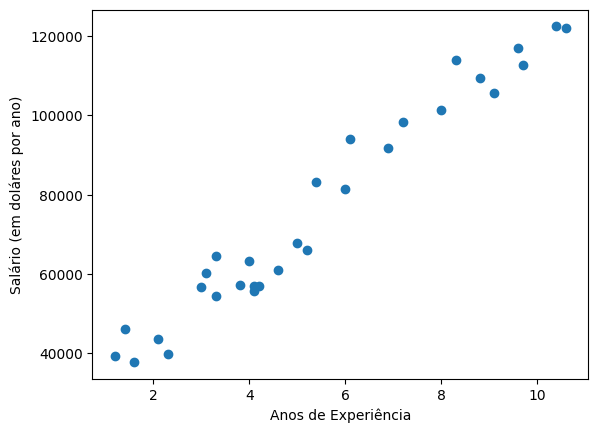

In [8]:
# Observando a dispersão dos dados
plt.scatter(x = df['YearsExperience'], y = df['Salary'])
plt.title('')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário (em doláres por ano)')
plt.show()

O gráfico gerado demonstra uma forte tendência linear positiva, indicando que, à medida que os anos de experiência aumentam, os salários também crescem de forma proporcional — sugerindo uma correlação alta entre as duas variáveis.

In [9]:
# Matriz de correlação de Pearson
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


A matriz de correlação revela uma correlação de 0.978 entre YearsExperience e Salary, o que indica uma relação linear forte e positiva: à medida que a experiência aumenta, o salário tende a aumentar quase na mesma proporção. O valor próximo de 1 reforça o que foi observado visualmente no gráfico de dispersão.

### Observado assimetrias e outliers com boxplot

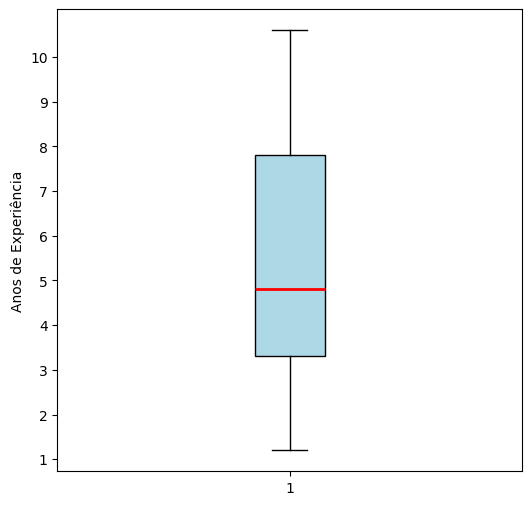

In [10]:
# Anos de experiência
plt.figure(figsize=(6, 6))
plt.boxplot(df['YearsExperience'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel("Anos de Experiência")
plt.yticks(range(1, 11, 1))
plt.show()

O boxplot acima mostra a distribuição dos anos de experiência dos indivíduos na amostra. A mediana está em torno de 5 anos, o que indica que metade dos profissionais possui até esse tempo de atuação. O primeiro quartil (Q1) está próximo de 3 anos, enquanto o terceiro quartil (Q3) está por volta de 8 anos, resultando em um intervalo interquartil (IQR) de aproximadamente 5 anos. Isso evidencia uma dispersão moderada no nível de experiência entre os profissionais.

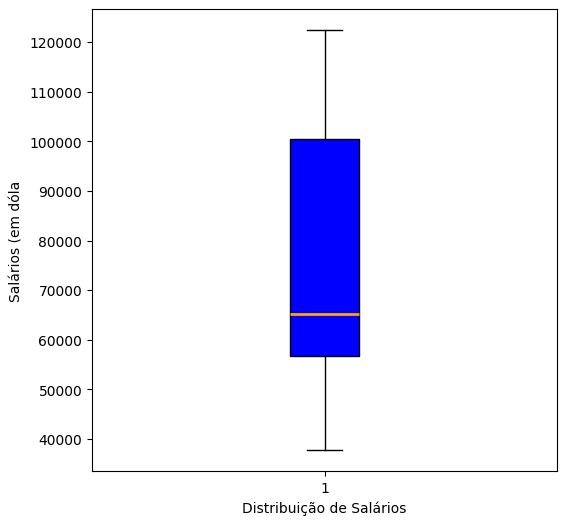

In [11]:
# Salários
plt.figure(figsize=(6, 6))
plt.boxplot(df['Salary'], patch_artist=True,
            boxprops=dict(facecolor='blue'),
            medianprops=dict(color='orange', linewidth=2))
plt.ylabel("Salários (em dóla")
plt.xlabel("Distribuição de Salários")
plt.yticks(range(40000, 120001, 10000))
plt.show()

O boxplot apresentado exibe a distribuição dos salários em uma determinada amostra. Observa-se que a mediana salarial gira em torno de 65.000 dólares, indicando que metade dos indivíduos recebe até esse valor. O primeiro quartil (Q1) está próximo de 55.000 dólares por ano, o que significa que 25% das pessoas ganham abaixo desse patamar, enquanto o terceiro quartil (Q3) está em torno de 100.000 dólares por ano, revelando que 75% ganham até esse limite. A amplitude interquartil, que mede a dispersão entre Q1 e Q3, é de aproximadamente 45.000 dólares por ano, indicando grande variabilidade nos salários dessa faixa intermediária. Os valores mínimo e máximo, estimados em cerca de 38.000 e 122.000 dólares, respectivamente, estão dentro dos limites do boxplot, sugerindo que não há outliers visíveis.

## Regressão Linear


In [12]:
# Importando as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Divisão dos dados

In [26]:
# Feature
X = df[['YearsExperience']]

# Target
y = df['Salary']

# Separação dos conjuntos de teste e de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshaping X_train and X_test to be 2D arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

### Modelo

In [27]:
# Criação do modelo
modelo = LinearRegression()

# Treinamento do modelo
modelo.fit(X_train, y_train)

LinearRegression()

### Previsão

In [35]:
y_pred = modelo.predict(X_test)
y_pred

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

### Visualizando os resultados

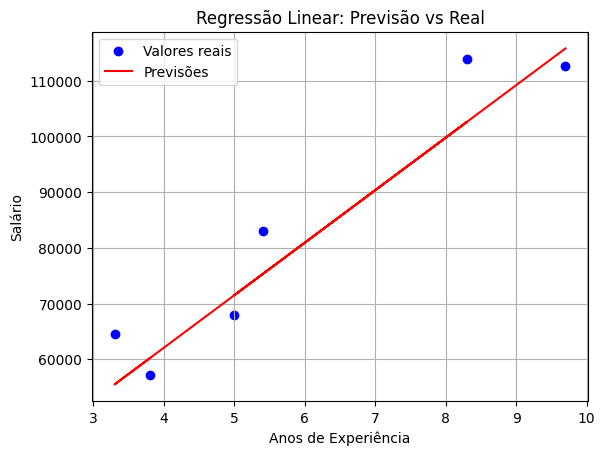

In [33]:
# Gráfico de dispersão
plt.scatter(X_test, y_test, color='blue', label='Valores reais')
plt.plot(X_test, y_pred, color='red', label='Previsões')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.title('Regressão Linear: Previsão vs Real')
plt.legend()
plt.grid()
plt.show()

### Métricas

In [34]:
# Erro médio absoluto
mae = mean_absolute_error(y_test, y_pred)

# Erro médio quadrático
mse = mean_squared_error(y_test, y_pred)

# Raíz do erro médio quadrático
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 6286.453830757745
MSE: 49830096.855908394
RMSE: 7059.04362190151
